# Optimización de los flujos de trabajo en un almacen con Q-Learning

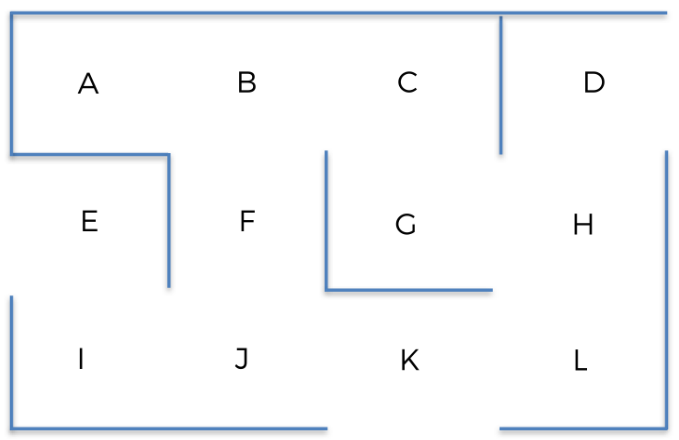

In [1]:
# Importación de las librerias
import numpy as np


In [2]:
# Configuracion de los parametros gamma y alpha para el algortimo
gamma = 0.75
alpha = 0.9

### PARTE 1 - DEFINICION DEL ENTORNO

In [3]:
# Definición de los estados
location_to_state = {
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3,
    'E': 4,
    'F': 5,
    'G': 6,
    'H': 7,
    'I': 8,
    'J': 9,
    'K': 10,
    'L': 11
}

In [4]:
# Definicion de las acciones
actions = [i for i in range(12)]

In [5]:
# Definición de las recompensas
# Columnas     A, B, C, D, E, F, G, H, I, J, K, L
R = np.array([
              [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # Desde Ase puede ir a B
              [1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0], # Desde B se puede ir a A, C y F
              [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
              [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
              [0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
              [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1],
              [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
              [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
              [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]
])

### PARTE 2 - CONSTRUCCION DE LA SOLUCION DE LA IA CON Q-LEARNING

In [6]:
# Transformación inversa de estados a ubicaciones
state_to_location = {state: location for location, state in location_to_state.items()}
state_to_location

{0: 'A',
 1: 'B',
 2: 'C',
 3: 'D',
 4: 'E',
 5: 'F',
 6: 'G',
 7: 'H',
 8: 'I',
 9: 'J',
 10: 'K',
 11: 'L'}

In [7]:
# Crear la función final que nos devuelve la ruta óptima
def route(starting_location, ending_location):
  R_new = np.copy(R)
  ending_state = location_to_state[ending_location]
  R_new[ending_state, ending_state] = 1000

  # Inicialización de los valores Q
  Q = np.array(np.zeros([12, 12])) # Q_0(s,a) = 0

  # Implementación del proceso de Q-Learning
  for i in range(1000):
    current_state = np.random.randint(0, 12)
    playable_actions = [] # Queremos las columnas es distinta de cero para la fila actual  (current_state)
    for j in range(12):
      if R_new[current_state, j] > 0:
        playable_actions.append(j)
    next_state = np.random.choice(playable_actions) # La accion lleva al siguiente estado
    TD = R_new[current_state, next_state] + gamma * Q[next_state, np.argmax(Q[next_state, ])] - Q[current_state, next_state] # Difrencia temporal
    Q[current_state, next_state] += alpha * TD

  route = [starting_location]
  next_location = starting_location
  while( next_location != ending_location ):
    starting_state = location_to_state[starting_location]
    next_state = np.argmax(Q[starting_state, ])
    next_location = state_to_location[next_state]
    route.append(next_location)
    starting_location = next_location
  return route


### PARTE 3 - PONER EL MODELO EN PRODUCCIÓN

In [10]:
# Imprimir la ruta final
print('Ruta Elegida: ')
print(route('B', 'D') )# Ubicacion inicial E y queremos que llegue a G

Ruta Elegida: 
['B', 'C', 'G', 'H', 'D']


In [11]:
def best_route(starting_location, intermediary_location, ending_location):
    return route(starting_location, intermediary_location) + route(intermediary_location, ending_location)[1:]

# Imprimir la ruta final
print("Ruta Elegida:")
print(best_route('E', 'B', 'G'))

Ruta Elegida:
['E', 'I', 'J', 'F', 'B', 'C', 'G']
